## Predicting the Sale Price of Bulldozers using Machine Learning

In this notebook, we are going to go through an example machine learning project with the goal of predicting sale price of bulldozers.

### 1. Problem Definition
> How can we predict the future sale price of a bulldozers?\
Our goal here is to use some data to build a machine learning model to predict the sale price of bulldozers in future.
### 2. Data
The data is downloaded from the Kaggle BlueBook for Bulldozers Competition: https://www.kaggle.com/c/bluebook-for-bulldozers/data

There are 3 main datasets:
* Train.csv is the training set, which contains data through the end of 2011.
* Valid.csv is the validation set, which contains data from January 1, 2012 - April 30, 2012 You make predictions on this set throughout the majority of the competition. Your score on this set is used to create the public leaderboard.
* Test.csv is the test set, which won't be released until the last week of the competition. It contains data from May 1, 2012 - November 2012. Your score on the test set determines your final rank for the competition.

### 3. Evaluation
The evaluation metric for this competition is the RMSLE (root mean squared log error) between the actual and predicted auction prices. 

For more on the evaluation of this project check:
https://www.kaggle.com/c/bluebook-for-bulldozers/overview/evaluation

**Note:** Our goal for this project will be to build a machine learning model which minimizes RMSLE.

### 4. Features
Kaggle provide a data dictionary detailing all of the features of the datasets. You can view data dictionary on Google Sheets:
https://docs.google.com/spreadsheets/d/1VsuMgUmj3FKb_Br6D7fxZwDsiN1HhWA8CxpmSzGB6DQ/edit#gid=276142607


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sklearn

In [3]:
# importing training and validation dataset

df = pd.read_csv('Data/bluebook-for-bulldozers/TrainAndValid.csv',
                low_memory=False)

In [4]:
df.head()

,SalesID,SalePrice,MachineID,ModelID,datasource,auctioneerID,YearMade,MachineHoursCurrentMeter,UsageBand,saledate,...,Undercarriage_Pad_Width,Stick_Length,Thumb,Pattern_Changer,Grouser_Type,Backhoe_Mounting,Blade_Type,Travel_Controls,Differential_Type,Steering_Controls
0,1139246,66000.0,999089,3157,121,3.0,2004,68.0,Low,11/16/2006 0:00,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Standard,Conventional
1,1139248,57000.0,117657,77,121,3.0,1996,4640.0,Low,3/26/2004 0:00,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Standard,Conventional
2,1139249,10000.0,434808,7009,121,3.0,2001,2838.0,High,2/26/2004 0:00,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1139251,38500.0,1026470,332,121,3.0,2001,3486.0,High,5/19/2011 0:00,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1139253,11000.0,1057373,17311,121,3.0,2007,722.0,Medium,7/23/2009 0:00,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 412698 entries, 0 to 412697
Data columns (total 53 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   SalesID                   412698 non-null  int64  
 1   SalePrice                 412698 non-null  float64
 2   MachineID                 412698 non-null  int64  
 3   ModelID                   412698 non-null  int64  
 4   datasource                412698 non-null  int64  
 5   auctioneerID              392562 non-null  float64
 6   YearMade                  412698 non-null  int64  
 7   MachineHoursCurrentMeter  147504 non-null  float64
 8   UsageBand                 73670 non-null   object 
 9   saledate                  412698 non-null  object 
 10  fiModelDesc               412698 non-null  object 
 11  fiBaseModel               412698 non-null  object 
 12  fiSecondaryDesc           271971 non-null  object 
 13  fiModelSeries             58667 non-null   o

In [6]:
df.isna().sum()

SalesID                          0
SalePrice                        0
MachineID                        0
ModelID                          0
datasource                       0
auctioneerID                 20136
YearMade                         0
MachineHoursCurrentMeter    265194
UsageBand                   339028
saledate                         0
fiModelDesc                      0
fiBaseModel                      0
fiSecondaryDesc             140727
fiModelSeries               354031
fiModelDescriptor           337882
ProductSize                 216605
fiProductClassDesc               0
state                            0
ProductGroup                     0
ProductGroupDesc                 0
Drive_System                305611
Enclosure                      334
Forks                       214983
Pad_Type                    331602
Ride_Control                259970
Stick                       331602
Transmission                224691
Turbocharged                331602
Blade_Extension     

In [7]:

df.columns

Index(['SalesID', 'SalePrice', 'MachineID', 'ModelID', 'datasource',
       'auctioneerID', 'YearMade', 'MachineHoursCurrentMeter', 'UsageBand',
       'saledate', 'fiModelDesc', 'fiBaseModel', 'fiSecondaryDesc',
       'fiModelSeries', 'fiModelDescriptor', 'ProductSize',
       'fiProductClassDesc', 'state', 'ProductGroup', 'ProductGroupDesc',
       'Drive_System', 'Enclosure', 'Forks', 'Pad_Type', 'Ride_Control',
       'Stick', 'Transmission', 'Turbocharged', 'Blade_Extension',
       'Blade_Width', 'Enclosure_Type', 'Engine_Horsepower', 'Hydraulics',
       'Pushblock', 'Ripper', 'Scarifier', 'Tip_Control', 'Tire_Size',
       'Coupler', 'Coupler_System', 'Grouser_Tracks', 'Hydraulics_Flow',
       'Track_Type', 'Undercarriage_Pad_Width', 'Stick_Length', 'Thumb',
       'Pattern_Changer', 'Grouser_Type', 'Backhoe_Mounting', 'Blade_Type',
       'Travel_Controls', 'Differential_Type', 'Steering_Controls'],
      dtype='object')

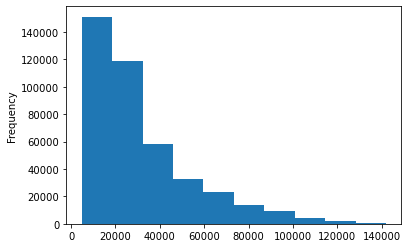

In [8]:
df.SalePrice.plot.hist();

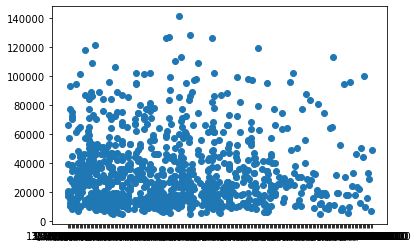

In [9]:
fig, ax = plt.subplots(figsize=(6,4))
ax.scatter(df['saledate'][:1000], df['SalePrice'][:1000]);

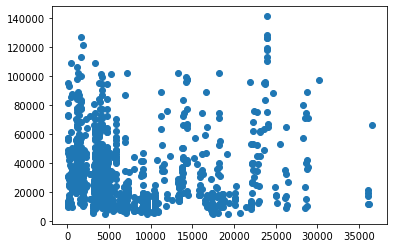

In [10]:
fig, ax = plt.subplots(figsize=(6,4))
ax = ax.scatter(df['ModelID'][:1000], df['SalePrice'][:1000]);

In [11]:
df[['saledate', 'ModelID', 'SalePrice']].head()

,saledate,ModelID,SalePrice
0,11/16/2006 0:00,3157,66000.0
1,3/26/2004 0:00,77,57000.0
2,2/26/2004 0:00,7009,10000.0
3,5/19/2011 0:00,332,38500.0
4,7/23/2009 0:00,17311,11000.0


In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 412698 entries, 0 to 412697
Data columns (total 53 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   SalesID                   412698 non-null  int64  
 1   SalePrice                 412698 non-null  float64
 2   MachineID                 412698 non-null  int64  
 3   ModelID                   412698 non-null  int64  
 4   datasource                412698 non-null  int64  
 5   auctioneerID              392562 non-null  float64
 6   YearMade                  412698 non-null  int64  
 7   MachineHoursCurrentMeter  147504 non-null  float64
 8   UsageBand                 73670 non-null   object 
 9   saledate                  412698 non-null  object 
 10  fiModelDesc               412698 non-null  object 
 11  fiBaseModel               412698 non-null  object 
 12  fiSecondaryDesc           271971 non-null  object 
 13  fiModelSeries             58667 non-null   o

In [13]:
df.saledate.dtype

dtype('O')

In [14]:
df.saledate[:100]

0     11/16/2006 0:00
1      3/26/2004 0:00
2      2/26/2004 0:00
3      5/19/2011 0:00
4      7/23/2009 0:00
           ...       
95    12/15/2005 0:00
96     1/29/2004 0:00
97     9/18/2008 0:00
98     11/3/2005 0:00
99      6/1/2006 0:00
Name: saledate, Length: 100, dtype: object

### Parsing Dates

converting and loading the data with `parse_dates` with pandas because the date time column is object

In [15]:
# importing data again with parse dates
df = pd.read_csv('Data/bluebook-for-bulldozers/TrainAndValid.csv', low_memory=False, parse_dates=['saledate'])
df.head()

,SalesID,SalePrice,MachineID,ModelID,datasource,auctioneerID,YearMade,MachineHoursCurrentMeter,UsageBand,saledate,...,Undercarriage_Pad_Width,Stick_Length,Thumb,Pattern_Changer,Grouser_Type,Backhoe_Mounting,Blade_Type,Travel_Controls,Differential_Type,Steering_Controls
0,1139246,66000.0,999089,3157,121,3.0,2004,68.0,Low,2006-11-16,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Standard,Conventional
1,1139248,57000.0,117657,77,121,3.0,1996,4640.0,Low,2004-03-26,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Standard,Conventional
2,1139249,10000.0,434808,7009,121,3.0,2001,2838.0,High,2004-02-26,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1139251,38500.0,1026470,332,121,3.0,2001,3486.0,High,2011-05-19,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1139253,11000.0,1057373,17311,121,3.0,2007,722.0,Medium,2009-07-23,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [16]:
df.saledate.dtype

dtype('<M8[ns]')

In [17]:
df.saledate[:100]

0    2006-11-16
1    2004-03-26
2    2004-02-26
3    2011-05-19
4    2009-07-23
        ...    
95   2005-12-15
96   2004-01-29
97   2008-09-18
98   2005-11-03
99   2006-06-01
Name: saledate, Length: 100, dtype: datetime64[ns]

In [18]:
np.dtype('datetime64[ns]') == np.dtype('<M8[ns]')

True

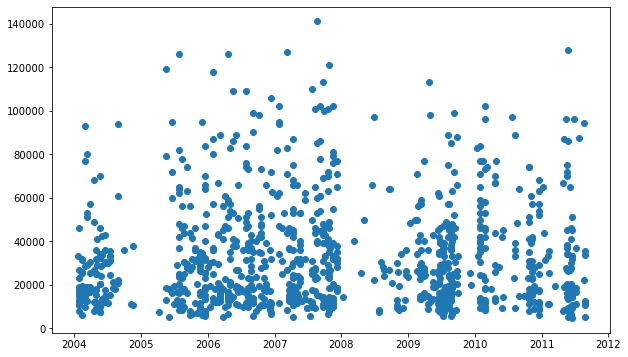

In [19]:
fig, ax = plt.subplots(figsize=(10,6))
ax.scatter(df.saledate[:1000], df.SalePrice[:1000]);

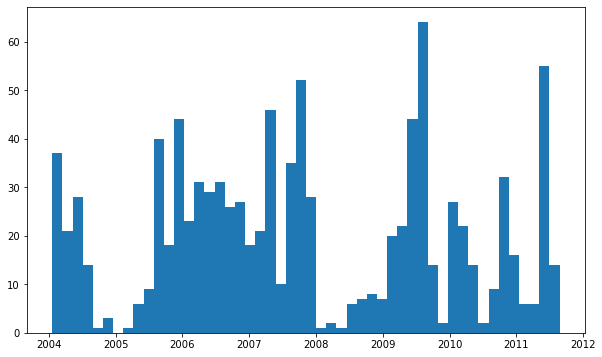

In [20]:
fig, ax = plt.subplots(figsize=(10,6))
ax.hist(df.saledate[:1000], bins=50);

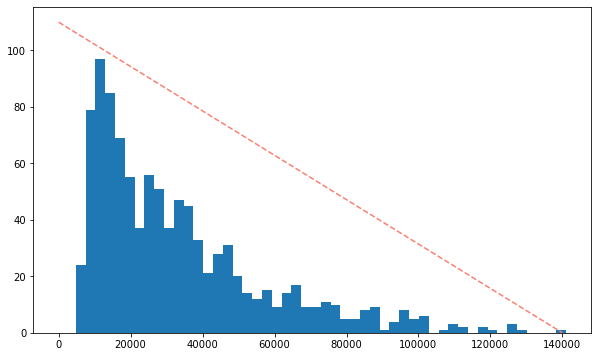

In [21]:
fig, ax = plt.subplots(figsize=(10,6))
ax.hist(df.SalePrice[:1000], bins=50);
ax.plot([0,140000],[110,0], color='salmon', label='Guessing', linestyle='--');

In [22]:
df_grp = df[['saledate', 'SalePrice']]
df_grp = df_grp.groupby('saledate').count()
df_grp.head()

,SalePrice
saledate,
1989-01-17,1
1989-01-31,97
1989-02-01,492
1989-02-14,18
1989-02-15,31


In [23]:
df_grp.shape

(4013, 1)

In [24]:
df_grp_flt = df[df['saledate']=='1989-02-01']
df_grp_flt[['saledate', 'SalePrice']].head()

,saledate,SalePrice
24108,1989-02-01,26000.0
24143,1989-02-01,25000.0
24159,1989-02-01,31000.0
24585,1989-02-01,24000.0
24621,1989-02-01,19500.0


### Sorting DataFrame

**We are going to sort dataframe by it's date**

In [25]:
df.sort_values(by='saledate', inplace=True, ascending=True)
df.saledate.head()

205615   1989-01-17
274835   1989-01-31
141296   1989-01-31
212552   1989-01-31
62755    1989-01-31
Name: saledate, dtype: datetime64[ns]

You can see the indexes has been changed this is because the DataFrame has been sorted with ascending order so the pandas show us the orignal index of the DataFrame's rows

### Make a copy of the orignal DataFrame

because when we manipulate the data frame the original data is still in the form of original

In [26]:
df_tmp = df.copy()

In [27]:
df_tmp.saledate.head()

205615   1989-01-17
274835   1989-01-31
141296   1989-01-31
212552   1989-01-31
62755    1989-01-31
Name: saledate, dtype: datetime64[ns]

In [28]:
df_tmp.head().T

,205615,274835,141296,212552,62755
SalesID,1646770,1821514,1505138,1671174,1329056
SalePrice,9500,14000,50000,16000,22000
MachineID,1126363,1194089,1473654,1327630,1336053
ModelID,8434,10150,4139,8591,4089
datasource,132,132,132,132,132
auctioneerID,18,99,99,99,99
YearMade,1974,1980,1978,1980,1984
MachineHoursCurrentMeter,NaN,NaN,NaN,NaN,NaN
UsageBand,NaN,NaN,NaN,NaN,NaN
saledate,1989-01-17 00:00:00,1989-01-31 00:00:00,1989-01-31 00:00:00,1989-01-31 00:00:00,1989-01-31 00:00:00


### Feature Engineering

#### Add datetime parameter for `saledate` column

In [29]:
df_tmp['saleYear'] = df_tmp.saledate.dt.year
df_tmp['saleMonth'] = df_tmp.saledate.dt.month
df_tmp['saleDay'] = df_tmp.saledate.dt.day
df_tmp['saleDayOfWeek'] = df_tmp.saledate.dt.dayofweek
df_tmp['saleDayOfYear'] = df_tmp.saledate.dt.dayofyear

In [30]:
df_tmp = df_tmp.drop(['saleOfWeek', 'saleOfYear'], axis=1)

KeyError: "['saleOfWeek' 'saleOfYear'] not found in axis"

In [31]:
df_tmp.head().T

,205615,274835,141296,212552,62755
SalesID,1646770,1821514,1505138,1671174,1329056
SalePrice,9500,14000,50000,16000,22000
MachineID,1126363,1194089,1473654,1327630,1336053
ModelID,8434,10150,4139,8591,4089
datasource,132,132,132,132,132
auctioneerID,18,99,99,99,99
YearMade,1974,1980,1978,1980,1984
MachineHoursCurrentMeter,NaN,NaN,NaN,NaN,NaN
UsageBand,NaN,NaN,NaN,NaN,NaN
saledate,1989-01-17 00:00:00,1989-01-31 00:00:00,1989-01-31 00:00:00,1989-01-31 00:00:00,1989-01-31 00:00:00


In [32]:
df_tmp.drop('saledate', axis=1, inplace=True)

In [33]:
df_tmp.Blade_Type.value_counts()

PAT                    39633
Straight               13461
None or Unspecified    11841
Semi U                  8907
VPAT                    3681
U                       1888
Angle                   1684
No                       743
Landfill                  26
Coal                      11
Name: Blade_Type, dtype: int64

In [34]:
df_tmp.Tire_Size.value_counts()

None or Unspecified    47823
20.5                   15773
14"                     9111
23.5                    8760
26.5                    4635
17.5                    3971
29.5                    2767
17.5"                   1815
13"                      776
20.5"                    737
15.5                     610
15.5"                    463
23.5"                    309
7.0"                      56
23.1"                     20
10"                        9
10 inch                    3
Name: Tire_Size, dtype: int64

In [35]:
df_tmp.state.value_counts()

Florida           67320
Texas             53110
California        29761
Washington        16222
Georgia           14633
Maryland          13322
Mississippi       13240
Ohio              12369
Illinois          11540
Colorado          11529
New Jersey        11156
North Carolina    10636
Tennessee         10298
Alabama           10292
Pennsylvania      10234
South Carolina     9951
Arizona            9364
New York           8639
Connecticut        8276
Minnesota          7885
Missouri           7178
Nevada             6932
Louisiana          6627
Kentucky           5351
Maine              5096
Indiana            4124
Arkansas           3933
New Mexico         3631
Utah               3046
Unspecified        2801
Wisconsin          2745
New Hampshire      2738
Virginia           2353
Idaho              2025
Oregon             1911
Michigan           1831
Wyoming            1672
Iowa               1336
Montana            1336
Oklahoma           1326
Nebraska            866
West Virginia   

### 5. Modeling 

we've done with EDA but let's start to do model-driven EDA.

In [36]:
# Let's build a machine learning model

from sklearn.ensemble import RandomForestRegressor

model = RandomForestRegressor(n_jobs=-1,
                             random_state=42)

model.fit(df_tmp.drop('SalePrice', axis=1), df['SalePrice'])

ValueError: could not convert string to float: 'Low'

In [ ]:
df_tmp.isna().sum()

we have Missing values and some object values that's why we have to fill or drop the missing values and convert the object values into numbers.

### Converting Strings into Categories

One way we can turn our string fields into numbers with pandas catgories.

we can check the different  datatypes of compatible with pandas here:
    https://pandas.pydata.org/pandas-docs/stable/reference/general_utility_functions.html

In [37]:
pd.api.types.is_string_dtype(df_tmp['state'])

True

In [38]:
# Finding the columns which contain strings
for labels, content in df_tmp.items():
    if pd.api.types.is_string_dtype(content):
        print(labels)

UsageBand
fiModelDesc
fiBaseModel
fiSecondaryDesc
fiModelSeries
fiModelDescriptor
ProductSize
fiProductClassDesc
state
ProductGroup
ProductGroupDesc
Drive_System
Enclosure
Forks
Pad_Type
Ride_Control
Stick
Transmission
Turbocharged
Blade_Extension
Blade_Width
Enclosure_Type
Engine_Horsepower
Hydraulics
Pushblock
Ripper
Scarifier
Tip_Control
Tire_Size
Coupler
Coupler_System
Grouser_Tracks
Hydraulics_Flow
Track_Type
Undercarriage_Pad_Width
Stick_Length
Thumb
Pattern_Changer
Grouser_Type
Backhoe_Mounting
Blade_Type
Travel_Controls
Differential_Type
Steering_Controls


In [39]:
# Converting strings into categories
for labels, content in df_tmp.items():
    if pd.api.types.is_string_dtype(content):
        df_tmp[labels] = content.astype('category').cat.as_ordered()

In [40]:
df_tmp.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 412698 entries, 205615 to 409203
Data columns (total 57 columns):
 #   Column                    Non-Null Count   Dtype   
---  ------                    --------------   -----   
 0   SalesID                   412698 non-null  int64   
 1   SalePrice                 412698 non-null  float64 
 2   MachineID                 412698 non-null  int64   
 3   ModelID                   412698 non-null  int64   
 4   datasource                412698 non-null  int64   
 5   auctioneerID              392562 non-null  float64 
 6   YearMade                  412698 non-null  int64   
 7   MachineHoursCurrentMeter  147504 non-null  float64 
 8   UsageBand                 73670 non-null   category
 9   fiModelDesc               412698 non-null  category
 10  fiBaseModel               412698 non-null  category
 11  fiSecondaryDesc           271971 non-null  category
 12  fiModelSeries             58667 non-null   category
 13  fiModelDescriptor       

In [41]:
df_tmp.state.cat.categories

Index(['Alabama', 'Alaska', 'Arizona', 'Arkansas', 'California', 'Colorado',
       'Connecticut', 'Delaware', 'Florida', 'Georgia', 'Hawaii', 'Idaho',
       'Illinois', 'Indiana', 'Iowa', 'Kansas', 'Kentucky', 'Louisiana',
       'Maine', 'Maryland', 'Massachusetts', 'Michigan', 'Minnesota',
       'Mississippi', 'Missouri', 'Montana', 'Nebraska', 'Nevada',
       'New Hampshire', 'New Jersey', 'New Mexico', 'New York',
       'North Carolina', 'North Dakota', 'Ohio', 'Oklahoma', 'Oregon',
       'Pennsylvania', 'Puerto Rico', 'Rhode Island', 'South Carolina',
       'South Dakota', 'Tennessee', 'Texas', 'Unspecified', 'Utah', 'Vermont',
       'Virginia', 'Washington', 'Washington DC', 'West Virginia', 'Wisconsin',
       'Wyoming'],
      dtype='object')

**These values are looking strings but these values are categories now, we've converted these strings into categories and pandas treat these categories values as a numbers.**

**lets check...**

In [42]:
df_tmp.state.cat.codes

205615    43
274835     8
141296     8
212552     8
62755      8
          ..
410879     4
412476     4
411927     4
407124     4
409203     4
Length: 412698, dtype: int8

In [43]:
df_tmp.isna().sum()

SalesID                          0
SalePrice                        0
MachineID                        0
ModelID                          0
datasource                       0
auctioneerID                 20136
YearMade                         0
MachineHoursCurrentMeter    265194
UsageBand                   339028
fiModelDesc                      0
fiBaseModel                      0
fiSecondaryDesc             140727
fiModelSeries               354031
fiModelDescriptor           337882
ProductSize                 216605
fiProductClassDesc               0
state                            0
ProductGroup                     0
ProductGroupDesc                 0
Drive_System                305611
Enclosure                      334
Forks                       214983
Pad_Type                    331602
Ride_Control                259970
Stick                       331602
Transmission                224691
Turbocharged                331602
Blade_Extension             386715
Blade_Width         

### Save the data 

In [44]:
df_tmp.to_csv('Data/bluebook-for-bulldozers/train_tmp.csv', index=False)

In [45]:
df_tmp = pd.read_csv('Data/bluebook-for-bulldozers/train_tmp.csv', low_memory=False)

## Filling Missing values

### Filling Numeric Values First

In [46]:
# Finding the numeric fields in our DataFrame

for labels, content in df_tmp.items():
    if pd.api.types.is_numeric_dtype(content):
        print(labels)

SalesID
SalePrice
MachineID
ModelID
datasource
auctioneerID
YearMade
MachineHoursCurrentMeter
saleYear
saleMonth
saleDay
saleDayOfWeek
saleDayOfYear


In [47]:
# Finding Missing values in numeric fields in our DataFrame

for labels, content in df_tmp.items():
    if pd.api.types.is_numeric_dtype(content):
        if pd.isnull(content).sum():
            print(labels)

auctioneerID
MachineHoursCurrentMeter


In [48]:
# let's fill
for labels, content in df_tmp.items():
    if pd.api.types.is_numeric_dtype(content):
        if pd.isnull(content).sum():
            # Add binary column to show whether sample had missing values or not
            df_tmp[labels+'_is_missing'] = pd.isnull(content)
            # Filling values
            df_tmp[labels] = content.fillna(content.median())

In [49]:
# Why we choose median over mean?
hundrads = np.full((1000, ), 100)
hundrads_billion = np.append(hundrads, 1000000000)
np.mean(hundrads), np.mean(hundrads_billion), np.median(hundrads), np.median(hundrads_billion)

(100.0, 999100.8991008991, 100.0, 100.0)

In [50]:
# CHecking if there is any missing values or not
for labels, content in df_tmp.items():
    if pd.api.types.is_numeric_dtype(content):
        if pd.isnull(content).sum():
            print(labels)

**the above Cell did not print any column name Because we filled that Missing values with the median of the column**

In [51]:
# Checking Filled columns and comparing with the column which missing values
df_tmp.auctioneerID_is_missing.value_counts()

False    392562
True      20136
Name: auctioneerID_is_missing, dtype: int64

In [52]:
df_tmp.auctioneerID_is_missing.head()

0    False
1    False
2    False
3    False
4    False
Name: auctioneerID_is_missing, dtype: bool

In [53]:
df_tmp.auctioneerID.head()

0    18.0
1    99.0
2    99.0
3    99.0
4    99.0
Name: auctioneerID, dtype: float64

In [54]:
df_tmp.isna().sum()

SalesID                                     0
SalePrice                                   0
MachineID                                   0
ModelID                                     0
datasource                                  0
auctioneerID                                0
YearMade                                    0
MachineHoursCurrentMeter                    0
UsageBand                              339028
fiModelDesc                                 0
fiBaseModel                                 0
fiSecondaryDesc                        140727
fiModelSeries                          354031
fiModelDescriptor                      337882
ProductSize                            216605
fiProductClassDesc                          0
state                                       0
ProductGroup                                0
ProductGroupDesc                            0
Drive_System                           305611
Enclosure                                 334
Forks                             

### Filling and Tuning categorical variables into numbers

In [55]:
# Check the columns which are not numeric
for labels, content in df_tmp.items():
    if not pd.api.types.is_numeric_dtype(content):
        print(labels)

UsageBand
fiModelDesc
fiBaseModel
fiSecondaryDesc
fiModelSeries
fiModelDescriptor
ProductSize
fiProductClassDesc
state
ProductGroup
ProductGroupDesc
Drive_System
Enclosure
Forks
Pad_Type
Ride_Control
Stick
Transmission
Turbocharged
Blade_Extension
Blade_Width
Enclosure_Type
Engine_Horsepower
Hydraulics
Pushblock
Ripper
Scarifier
Tip_Control
Tire_Size
Coupler
Coupler_System
Grouser_Tracks
Hydraulics_Flow
Track_Type
Undercarriage_Pad_Width
Stick_Length
Thumb
Pattern_Changer
Grouser_Type
Backhoe_Mounting
Blade_Type
Travel_Controls
Differential_Type
Steering_Controls


**these columns are categorical and the point is pandas can give us numbers of categorical columns**

mean when we have categorical columns we can use those columns is a numbers\
recently we convert object/String columns into categroical becuase we want to use cetegorical columns as a numbers

In [56]:
pd.Categorical(df_tmp['state'])

['Texas', 'Florida', 'Florida', 'Florida', 'Florida', ..., 'California', 'California', 'California', 'California', 'California']
Length: 412698
Categories (53, object): ['Alabama', 'Alaska', 'Arizona', 'Arkansas', ..., 'Washington DC', 'West Virginia', 'Wisconsin', 'Wyoming']

In [57]:
pd.Categorical(df_tmp['state']).codes

array([43,  8,  8, ...,  4,  4,  4], dtype=int8)

**You can see that we can use categorical values as a numbers**

In [58]:
# Let;s fill that missy values
for labels, content in df_tmp.items():
    if not pd.api.types.is_numeric_dtype(content):
        # Add binary column to show whether sample had missing values or not
        df_tmp[labels+'_is_missing'] = pd.isnull(content)
        # Turn categorical values into numbers
        df_tmp[labels] = pd.Categorical(content).codes+1

**Why we add +1?**\
it's Becuase when pandas convert categorical values into numbers pandas subtract/minus 1\
let's check

In [59]:
pd.Categorical(df_tmp.state).codes

array([43,  8,  8, ...,  4,  4,  4], dtype=int8)

In [60]:
pd.Categorical(df_tmp.UsageBand).codes

array([0, 0, 0, ..., 0, 0, 0], dtype=int8)

**You can see that the pandas subtract 1 from the content of the values that why pandas return values in minus (-1)**\
let's add 1

In [61]:
pd.Categorical(df_tmp.UsageBand).codes+1

array([1, 1, 1, ..., 1, 1, 1], dtype=int8)

**Let's check our DataFrame and find that is there any missing values or not**

In [62]:
df_tmp.isna().sum()

SalesID                         0
SalePrice                       0
MachineID                       0
ModelID                         0
datasource                      0
                               ..
Backhoe_Mounting_is_missing     0
Blade_Type_is_missing           0
Travel_Controls_is_missing      0
Differential_Type_is_missing    0
Steering_Controls_is_missing    0
Length: 103, dtype: int64

**There is No missing values in our DataFrame Now, We can build a Machine Learning model for our DataFrame**

In [63]:
%%time
# instanciating the model
model = RandomForestRegressor(n_jobs=-1,
                             random_state=42)

# Fitting the model
model.fit(df_tmp.drop('SalePrice', axis=1), df_tmp['SalePrice'])

Wall time: 10min 14s


RandomForestRegressor(n_jobs=-1, random_state=42)

In [64]:
model.score(df_tmp.drop('SalePrice', axis=1), df_tmp['SalePrice'])

0.9875468079970562

the accuracy is not realible. because we did not split our data into train, valid and test sets. so the ML model predict 98% of accuracy..\
so we need to split our data into Train, Valid and Testing data sets.

**Project Instruction** (from kaggle)\
**There are 3 main datasets:**

* Train.csv is the training set, which contains data through the end of 2011.
* Valid.csv is the validation set, which contains data from January 1, 2012 - April 30, 2012 You make predictions on this set throughout the majority of the competition. Your score on this set is used to create the public leaderboard.
* Test.csv is the test set, which won't be released until the last week of the competition. It contains data from May 1, 2012 - November 2012. Your score on the test set determines your final rank for the competition.

### Spliting the data into train, valid and test sets

In [65]:
df_tmp.saleYear.value_counts()

2009    43849
2008    39767
2011    35197
2010    33390
2007    32208
2006    21685
2005    20463
2004    19879
2001    17594
2000    17415
2002    17246
2003    15254
1998    13046
1999    12793
2012    11573
1997     9785
1996     8829
1995     8530
1994     7929
1993     6303
1992     5519
1991     5109
1989     4806
1990     4529
Name: saleYear, dtype: int64

In [66]:
# Split data into Train and validation sets
df_val = df_tmp[df_tmp.saleYear == 2012]
df_train = df_tmp[df_tmp.saleYear != 2012]

len(df_val), len(df_train)

(11573, 401125)

In [67]:
# Split data into X and y
X_train, y_train = df_train.drop('SalePrice', axis=1), df_train['SalePrice']
X_valid, y_valid = df_val.drop('SalePrice', axis=1), df_val['SalePrice']

X_train.shape, y_train.shape, X_valid.shape, y_valid.shape

((401125, 102), (401125,), (11573, 102), (11573,))

In [68]:
y_train

0          9500.0
1         14000.0
2         50000.0
3         16000.0
4         22000.0
           ...   
401120    29000.0
401121    11000.0
401122    11000.0
401123    18000.0
401124    13500.0
Name: SalePrice, Length: 401125, dtype: float64

In [69]:
df_tmp

,SalesID,SalePrice,MachineID,ModelID,datasource,auctioneerID,YearMade,MachineHoursCurrentMeter,UsageBand,fiModelDesc,...,Undercarriage_Pad_Width_is_missing,Stick_Length_is_missing,Thumb_is_missing,Pattern_Changer_is_missing,Grouser_Type_is_missing,Backhoe_Mounting_is_missing,Blade_Type_is_missing,Travel_Controls_is_missing,Differential_Type_is_missing,Steering_Controls_is_missing
0,1646770,9500.0,1126363,8434,132,18.0,1974,0.0,0,4593,...,True,True,True,True,True,False,False,False,True,True
1,1821514,14000.0,1194089,10150,132,99.0,1980,0.0,0,1820,...,True,True,True,True,True,True,True,True,False,False
2,1505138,50000.0,1473654,4139,132,99.0,1978,0.0,0,2348,...,True,True,True,True,True,False,False,False,True,True
3,1671174,16000.0,1327630,8591,132,99.0,1980,0.0,0,1819,...,True,True,True,True,True,True,True,True,False,False
4,1329056,22000.0,1336053,4089,132,99.0,1984,0.0,0,2119,...,True,True,True,True,True,False,False,False,True,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
412693,6302984,16000.0,1915521,5266,149,99.0,2001,0.0,0,2101,...,True,True,True,True,True,False,False,False,True,True
412694,6324811,6000.0,1919104,19330,149,99.0,2004,0.0,0,240,...,True,True,True,True,True,True,True,True,True,True
412695,6313029,16000.0,1918416,17244,149,99.0,2004,0.0,0,627,...,True,True,True,True,True,True,True,True,True,True
412696,6266251,55000.0,509560,3357,149,99.0,1993,0.0,0,83,...,True,True,True,True,True,True,True,True,True,True


## Evaluation
    The evaluation metrix for this competition is RMSLE (Root Mean Square Log Error)

### Regression Evaluation Metrix:
* R^2
* Mean absolute error (MAE)
* Mean squared error (MSE)
* Mean sqaured log error (MSlE)

### Building an Evaluation Metrix

In [79]:
# Creating evaluation metrix function
from sklearn.metrics import mean_squared_log_error, mean_absolute_error, r2_score

def rmsle(y_test, y_preds):
    '''
    Calculate root mean squared error between predictions and true lables.
    '''
    return np.sqrt(mean_squared_log_error(y_test, y_preds))
    
# Creating function to evaluate model on few different levels
def show_scores(model):
    train_preds = model.predict(X_train)
    val_preds = model.predict(X_valid)
    scores = {'Training MAE': mean_absolute_error(y_train, train_preds),
              'Valid MAE': mean_absolute_error(y_valid, val_preds),
              'Training RMSLE': rmsle(y_train, train_preds),
              'valid RMSLE': rmsle(y_valid, val_preds),
              'Training R^2': r2_score(y_train, train_preds),
              'Valid R^2': r2_score(y_valid, val_preds)}
    
    return scores

### Testing our model on a subset of our data

In [ ]:
# This cell will takes more time because our dataset is very huge to process

# model = RandomForestRegressor(n_jobs=-1,
                              random_state=42,
                              max_samples=)

# model.fit(X_train, y_train)

In [ ]:
## our data is very huge to process on my computer
## so we will Test a subset of our data

model = RandomForestRegressor(n_jobs=-1,
                              random_state=42,
                              max_samples=10000)


In [77]:
%%time
model.fit(X_train, y_train)

Wall time: 8min 29s


RandomForestRegressor(n_jobs=-1, random_state=42)

In [80]:
show_scores(model)

{'Training MAE': 1578.2015208725463,
 'Valid MAE': 6120.959637950402,
 'Training RMSLE': 0.08426351714047395,
 'valid RMSLE': 0.25557446689440955,
 'Training R^2': 0.9875150955953674,
 'Valid R^2': 0.8727175969771312}

**Experimenting samples to check the score of the RMSLE**

In [101]:
model = RandomForestRegressor(n_jobs=-1,
                              random_state=42,
                              max_samples=20000)

In [102]:
%%time
model.fit(X_train, y_train)

Wall time: 31.8 s


RandomForestRegressor(max_samples=20000, n_jobs=-1, random_state=42)

In [103]:
show_scores(model)

{'Training MAE': 5047.9944919164855,
 'Valid MAE': 6754.1377611682365,
 'Training RMSLE': 0.23695842660674307,
 'valid RMSLE': 0.27792674678471974,
 'Training R^2': 0.8833629837266058,
 'Valid R^2': 0.8501458046953286}

## Hyperparameter Tuning with RandomizedSearchCV

In [105]:
%%time
from sklearn.model_selection import RandomizedSearchCV

# different RandomForestRegressor hyperparameters
rf_grid = {'n_estimators': np.arange(10, 100, 10),
           'max_depth': [None, 3, 5, 10],
           'min_samples_split': np.arange(2, 20, 2),
           'min_samples_leaf': np.arange(1, 20, 2),
           'max_features': [0.5, 1, 'sqrt', 'auto'],
           'max_samples': [10000]}

rs_model = RandomizedSearchCV(RandomForestRegressor(n_jobs=-1, random_state=42),
                             param_distributions=rf_grid,
                             n_iter=2,
                             cv=5,
                             verbose=True)

rs_model.fit(X_train, y_train)

Fitting 5 folds for each of 2 candidates, totalling 10 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:  1.1min finished


Wall time: 1min 11s


RandomizedSearchCV(cv=5,
                   estimator=RandomForestRegressor(n_jobs=-1, random_state=42),
                   n_iter=2,
                   param_distributions={'max_depth': [None, 3, 5, 10],
                                        'max_features': [0.5, 1, 'sqrt',
                                                         'auto'],
                                        'max_samples': [10000],
                                        'min_samples_leaf': array([ 1,  3,  5,  7,  9, 11, 13, 15, 17, 19]),
                                        'min_samples_split': array([ 2,  4,  6,  8, 10, 12, 14, 16, 18]),
                                        'n_estimators': array([10, 20, 30, 40, 50, 60, 70, 80, 90])},
                   verbose=True)

In [106]:
# Finding the best hyerparameter model
rs_model.best_params_

{'n_estimators': 30,
 'min_samples_split': 12,
 'min_samples_leaf': 1,
 'max_samples': 10000,
 'max_features': 0.5,
 'max_depth': None}

In [107]:
# Checking score
show_scores(rs_model)

{'Training MAE': 6008.1500013673485,
 'Valid MAE': 7371.48109967666,
 'Training RMSLE': 0.2738252906024388,
 'valid RMSLE': 0.30303084785202333,
 'Training R^2': 0.8399083080313816,
 'Valid R^2': 0.8268102974683021}

### Train a model with best hyerparameter

In [110]:
%%time
bst_model = RandomForestRegressor(n_estimators=40,
                                  min_samples_split=14,
                                  min_samples_leaf=1,
                                  max_features=0.5,
                                  n_jobs=-1,
                                  max_samples=None,
                                  random_state=42)

bst_model.fit(X_train, y_train)

Wall time: 1min 29s


RandomForestRegressor(max_features=0.5, min_samples_split=14, n_estimators=40,
                      n_jobs=-1, random_state=42)

In [111]:
show_scores(bst_model)

{'Training MAE': 2953.8161137163484,
 'Valid MAE': 5951.247761444453,
 'Training RMSLE': 0.14469006962371858,
 'valid RMSLE': 0.24524163989538328,
 'Training R^2': 0.9588145522577225,
 'Valid R^2': 0.8818019502450094}

In [113]:
show_scores(rs_model)

{'Training MAE': 6008.1500013673485,
 'Valid MAE': 7371.481099676659,
 'Training RMSLE': 0.27382529060243876,
 'valid RMSLE': 0.30303084785202333,
 'Training R^2': 0.8399083080313816,
 'Valid R^2': 0.8268102974683021}

**our bst_model scored less than rs_model this is because our rs_model score and train on just 1000 or subset of our data and our bst_model train on entire dataset**

## Make Prediction on Test data

In [117]:
# Import the test data
test_df = pd.read_csv('Data/bluebook-for-bulldozers/Test.csv',
                      low_memory = False,
                      parse_dates=['saledate'])
test_df.head()

,SalesID,MachineID,ModelID,datasource,auctioneerID,YearMade,MachineHoursCurrentMeter,UsageBand,saledate,fiModelDesc,...,Undercarriage_Pad_Width,Stick_Length,Thumb,Pattern_Changer,Grouser_Type,Backhoe_Mounting,Blade_Type,Travel_Controls,Differential_Type,Steering_Controls
0,1227829,1006309,3168,121,3,1999,3688.0,Low,2012-05-03,580G,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1227844,1022817,7271,121,3,1000,28555.0,High,2012-05-10,936,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Standard,Conventional
2,1227847,1031560,22805,121,3,2004,6038.0,Medium,2012-05-10,EC210BLC,...,None or Unspecified,"9' 6""",Manual,None or Unspecified,Double,NaN,NaN,NaN,NaN,NaN
3,1227848,56204,1269,121,3,2006,8940.0,High,2012-05-10,330CL,...,None or Unspecified,None or Unspecified,Manual,Yes,Triple,NaN,NaN,NaN,NaN,NaN
4,1227863,1053887,22312,121,3,2005,2286.0,Low,2012-05-10,650K,...,NaN,NaN,NaN,NaN,NaN,None or Unspecified,PAT,None or Unspecified,NaN,NaN


In [118]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12457 entries, 0 to 12456
Data columns (total 52 columns):
 #   Column                    Non-Null Count  Dtype         
---  ------                    --------------  -----         
 0   SalesID                   12457 non-null  int64         
 1   MachineID                 12457 non-null  int64         
 2   ModelID                   12457 non-null  int64         
 3   datasource                12457 non-null  int64         
 4   auctioneerID              12457 non-null  int64         
 5   YearMade                  12457 non-null  int64         
 6   MachineHoursCurrentMeter  2129 non-null   float64       
 7   UsageBand                 1834 non-null   object        
 8   saledate                  12457 non-null  datetime64[ns]
 9   fiModelDesc               12457 non-null  object        
 10  fiBaseModel               12457 non-null  object        
 11  fiSecondaryDesc           8482 non-null   object        
 12  fiModelSeries     

In [120]:
test_df.shape

(12457, 52)

In [121]:
test_df.isna().sum()

SalesID                         0
MachineID                       0
ModelID                         0
datasource                      0
auctioneerID                    0
YearMade                        0
MachineHoursCurrentMeter    10328
UsageBand                   10623
saledate                        0
fiModelDesc                     0
fiBaseModel                     0
fiSecondaryDesc              3975
fiModelSeries               10451
fiModelDescriptor            9433
ProductSize                  6409
fiProductClassDesc              0
state                           0
ProductGroup                    0
ProductGroupDesc                0
Drive_System                 9698
Enclosure                       2
Forks                        6149
Pad_Type                    10349
Ride_Control                 8216
Stick                       10349
Transmission                 7639
Turbocharged                10349
Blade_Extension             11806
Blade_Width                 11806
Enclosure_Type

In [122]:
test_df = test_df.copy()

In [123]:
test_df.saledate.head()

0   2012-05-03
1   2012-05-10
2   2012-05-10
3   2012-05-10
4   2012-05-10
Name: saledate, dtype: datetime64[ns]

### transforming our test data in the same format as training data

In [124]:
test_df['saleYear'] = test_df.saledate.dt.year
test_df['saleMonth'] = test_df.saledate.dt.month
test_df['saleDay'] = test_df.saledate.dt.day
test_df['saleDayOfWeek'] = test_df.saledate.dt.dayofweek
test_df['saleDayOfYear'] = test_df.saledate.dt.dayofyear

In [130]:
test_df[['saledate', 'saleYear', 'saleMonth', 'saleDay', 'saleDayOfWeek', 'saleDayOfYear']]

,saledate,saleYear,saleMonth,saleDay,saleDayOfWeek,saleDayOfYear
0,2012-05-03,2012,5,3,3,124
1,2012-05-10,2012,5,10,3,131
2,2012-05-10,2012,5,10,3,131
3,2012-05-10,2012,5,10,3,131
4,2012-05-10,2012,5,10,3,131
...,...,...,...,...,...,...
12452,2012-10-24,2012,10,24,2,298
12453,2012-10-24,2012,10,24,2,298
12454,2012-10-24,2012,10,24,2,298
12455,2012-10-24,2012,10,24,2,298


In [131]:
df_tmp.saledate

AttributeError: 'DataFrame' object has no attribute 'saledate'

In [133]:
test_df.saledate

0       2012-05-03
1       2012-05-10
2       2012-05-10
3       2012-05-10
4       2012-05-10
           ...    
12452   2012-10-24
12453   2012-10-24
12454   2012-10-24
12455   2012-10-24
12456   2012-09-19
Name: saledate, Length: 12457, dtype: datetime64[ns]

In [134]:
test_df.drop('saledate', axis=1, inplace=True)

In [135]:
test_df.saledate

AttributeError: 'DataFrame' object has no attribute 'saledate'

### Filling Numeric values of test data set

In [138]:
for labels, content in test_df.items():
    if pd.api.types.is_numeric_dtype(content):
        if pd.isnull(content).sum():
            test_df[labels+'_is_numeric'] = pd.isnull(content)
            test_df[labels] = content.fillna(content.median())

In [140]:
for labels, content in test_df.items():
    if pd.api.types.is_numeric_dtype(content):
        if pd.isnull(content).sum():
            print(labels)

### Filling and converting strings columns into categorical of test data set

In [141]:
for labels, content in test_df.items():
    if pd.api.types.is_string_dtype(content):
        test_df[labels] = content.astype('category').cat.as_ordered()

### Converting categorical columns into numbers/codes of Test data set

In [143]:
for labels, content in test_df.items():
    if not pd.api.types.is_numeric_dtype(content):
        test_df[labels+'_is_missing'] = pd.isnull(content)
        test_df[labels] = pd.Categorical(content).codes+1


In [145]:
test_df.isnull().sum()

SalesID                         0
MachineID                       0
ModelID                         0
datasource                      0
auctioneerID                    0
                               ..
Backhoe_Mounting_is_missing     0
Blade_Type_is_missing           0
Travel_Controls_is_missing      0
Differential_Type_is_missing    0
Steering_Controls_is_missing    0
Length: 101, dtype: int64

In [148]:
test_df.shape

(12457, 101)

In [150]:
X_train.shape

(401125, 102)

In [154]:
# Finding how columns is differ from each other(X_train and test_df) using sets
set(X_train.columns) - set(test_df.columns)

{'MachineHoursCurrentMeter_is_missing', 'auctioneerID_is_missing'}

In [161]:
X_train['auctioneerID_is_missing'].head()

0    False
1    False
2    False
3    False
4    False
Name: auctioneerID_is_missing, dtype: bool

In [162]:
X_train['auctioneerID_is_missing'].tail()

401120    False
401121    False
401122    False
401123    False
401124    False
Name: auctioneerID_is_missing, dtype: bool

In [163]:
## Let's manually add missing columns in test_df
test_df['auctioneerID_is_missing'] = False
test_df.head()

,SalesID,MachineID,ModelID,datasource,auctioneerID,YearMade,MachineHoursCurrentMeter,UsageBand,fiModelDesc,fiBaseModel,...,Stick_Length_is_missing,Thumb_is_missing,Pattern_Changer_is_missing,Grouser_Type_is_missing,Backhoe_Mounting_is_missing,Blade_Type_is_missing,Travel_Controls_is_missing,Differential_Type_is_missing,Steering_Controls_is_missing,auctioneerID_is_missing
0,1227829,1006309,3168,121,3,1999,3688.0,2,499,180,...,True,True,True,True,True,True,True,True,True,False
1,1227844,1022817,7271,121,3,1000,28555.0,1,831,292,...,True,True,True,True,True,True,True,False,False,False
2,1227847,1031560,22805,121,3,2004,6038.0,3,1177,404,...,False,False,False,False,True,True,True,True,True,False
3,1227848,56204,1269,121,3,2006,8940.0,1,287,113,...,False,False,False,False,True,True,True,True,True,False
4,1227863,1053887,22312,121,3,2005,2286.0,2,566,196,...,True,True,True,True,False,False,False,True,True,False


In [164]:
test_df.shape, X_train.shape

((12457, 102), (401125, 102))

**Finally our test data set has the same features as our train data set. so we can make prediction now on our test data set**

### Making Predictions

In [165]:
# Make Predictions on the test data

test_preds = bst_model.predict(test_df)

In [166]:
test_preds

array([20614.36780887, 19897.80170658, 44852.21959446, ...,
       14296.98620472, 22164.85757662, 31683.80063427])

We are all done here our model predict on our test data set\
but the kaggle challenge want just two columns:
* SaleID
* salePrice\
https://www.kaggle.com/c/bluebook-for-bulldozers/overview/evaluation


Formating predictions into the same format kaggle is after

In [169]:
df_preds = pd.DataFrame()

In [172]:
test_df.SalesID

0        1227829
1        1227844
2        1227847
3        1227848
4        1227863
          ...   
12452    6643171
12453    6643173
12454    6643184
12455    6643186
12456    6643196
Name: SalesID, Length: 12457, dtype: int64

In [173]:
df_preds['SalesID'] = test_df['SalesID']

In [174]:
df_preds['SalePrice'] = test_preds

In [175]:
df_preds

,SalesID,SalePrice
0,1227829,20614.367809
1,1227844,19897.801707
2,1227847,44852.219594
3,1227848,68346.325323
4,1227863,39487.349708
...,...,...
12452,6643171,46466.092910
12453,6643173,17500.493352
12454,6643184,14296.986205
12455,6643186,22164.857577


## Feature Importance

In [176]:
# Finding feature importance of our best model
bst_model.feature_importances_

array([3.39445533e-02, 1.81148281e-02, 4.09167072e-02, 1.70752171e-03,
       3.40797459e-03, 2.08200698e-01, 2.95067052e-03, 1.10113725e-03,
       4.16122668e-02, 4.71911805e-02, 6.23815431e-02, 4.67433955e-03,
       1.52524442e-02, 1.52517337e-01, 4.72224713e-02, 5.96817956e-03,
       1.29351899e-03, 2.78088439e-03, 2.37248769e-03, 6.17114453e-02,
       8.13525488e-04, 3.61873268e-05, 9.19098115e-04, 2.23170993e-04,
       1.28102678e-03, 2.06519636e-05, 2.01477316e-03, 6.63364759e-03,
       2.15274492e-03, 2.50178165e-03, 4.63902393e-03, 3.85873985e-03,
       2.76062667e-03, 1.00782454e-03, 2.47969268e-04, 6.04239818e-03,
       7.64997072e-04, 1.57100537e-02, 2.29716203e-03, 2.58372272e-03,
       8.07637426e-04, 9.18548690e-04, 1.35656446e-03, 5.81458569e-04,
       4.96716928e-04, 3.79552257e-04, 5.31712788e-04, 2.71823509e-03,
       8.34294376e-04, 3.12136841e-04, 2.14075157e-04, 7.42422919e-02,
       3.80158492e-03, 5.67641024e-03, 2.87154703e-03, 9.83349904e-03,
      

In [177]:
len(bst_model.feature_importances_)

102

In [178]:
X_train.shape

(401125, 102)

In [194]:
## Visualizing feature importance
def plot_feature(columns, importances, n=20):
    df = (pd.DataFrame({'Features': columns,
                        'Feature_importances': importances}).sort_values('Feature_importances', ascending=True)
          .reset_index(drop=True))
    
    #plot the importance
    fig, ax = plt.subplots()
    ax.barh(df['Features'][:20], df['Feature_importances'][:20])
    ax.set_ylabel('Features')
    ax.set_xlabel('Feature Importance')

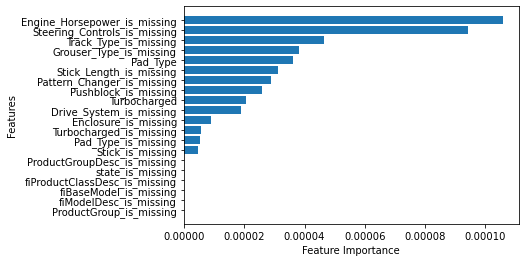

In [195]:
plot_feature(X_train.columns, bst_model.feature_importances_)

In [201]:
df_tmp['Engine_Horsepower_is_missing'].value_countscounts()

True     386715
False     25983
Name: Engine_Horsepower_is_missing, dtype: int64